In [1]:
import pandas as pd
import numpy as np
import csv
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading the data
spam_data = pd.read_csv('spambase_new.csv')

In [3]:
# Split the dataset into the feature matrix (X) and the target variable (y)
X = spam_data.drop('spam, non-spam classes', axis=1)
y = spam_data['spam, non-spam classes']

In [4]:
# Split the dataset into training and testing sets with a 9:1 ratio
#Set the random state equals to 0 because every time I run the code same split is generated.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [5]:
#Centering and Feature Scaling
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [6]:
#Perform PCA
#Retain 95% of information from the datset
pca = PCA(0.95)
X_train_pca = pca.fit_transform(scaled_X_train)
X_test_pca = pca.transform(scaled_X_test)

In [7]:
pca.n_components_

49

In [8]:
X_train_pca.shape

(3789, 49)

In [9]:
y_train.shape

(3789,)

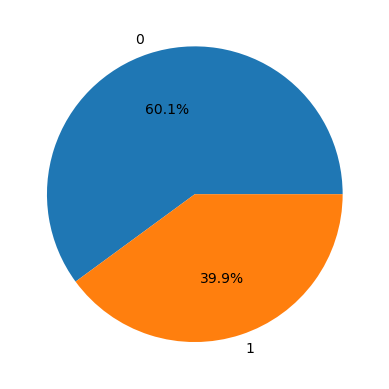

In [10]:
unique_labels, label_counts = np.unique(y_train, return_counts=True)
plt.pie(label_counts, labels=unique_labels, autopct='%1.1f%%')
plt.show()

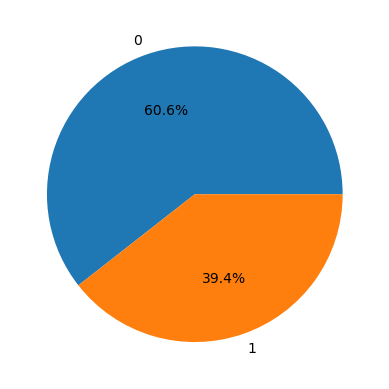

In [11]:
unique_labels, label_counts = np.unique(y_test, return_counts=True)
plt.pie(label_counts, labels=unique_labels, autopct='%1.1f%%')
plt.show()

**Scree Plot**

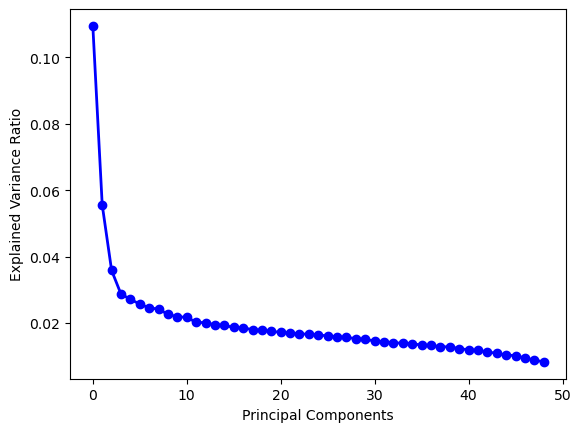

In [12]:
plt.plot((np.arange(pca.n_components_)), pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.show()

**Variance Explanation Plot**

In [13]:
pca.explained_variance_ratio_

array([0.10947535, 0.05556683, 0.0358294 , 0.02868966, 0.0271688 ,
       0.02565881, 0.02458213, 0.02417705, 0.02260543, 0.02188607,
       0.02170827, 0.02020813, 0.02009365, 0.01945683, 0.01930077,
       0.01865183, 0.01856672, 0.01796751, 0.01781822, 0.01747541,
       0.01719437, 0.01700054, 0.01672558, 0.01662851, 0.01640093,
       0.0161104 , 0.01588092, 0.01563824, 0.01531056, 0.01508866,
       0.01457023, 0.01441327, 0.01402119, 0.01393563, 0.01380936,
       0.01330648, 0.0132294 , 0.01288336, 0.01278352, 0.01230873,
       0.01191089, 0.01175584, 0.01131623, 0.01083869, 0.01037527,
       0.01015452, 0.00944801, 0.00884303, 0.00827368])

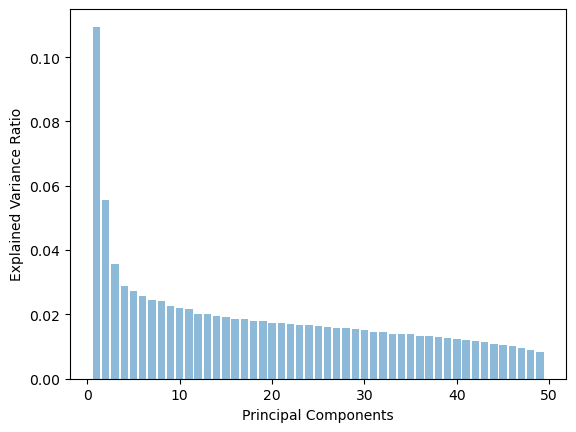

In [14]:
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.show()

**Cumulative Variance Plot**

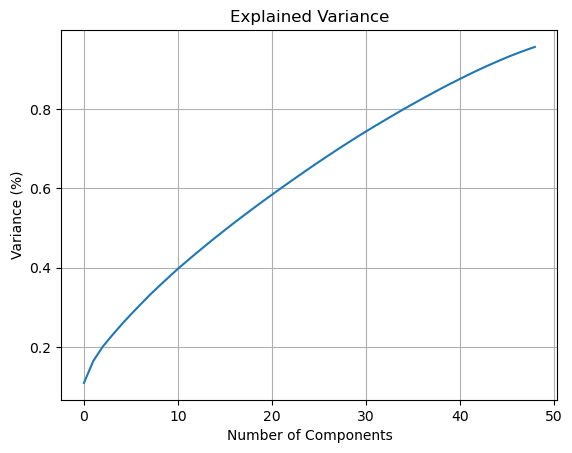

In [15]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.grid(True)
plt.show()

**Scatter Plot of PC1 and PC2**

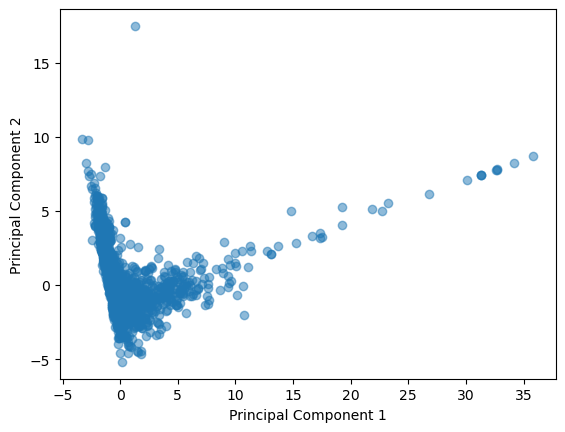

In [16]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# K-Nearest Neighbor(KNN) Classification Model

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
classifier = KNeighborsClassifier()

**Optimal K value** 

In [19]:
#Grid Search
from sklearn.model_selection import GridSearchCV

#Define the parameter grid for k values to search
param_grid = {'n_neighbors': range(1, 30)}

#Perform grid search using cross-validation
grid_search = GridSearchCV(classifier, param_grid, cv=5)
grid_search.fit(X_train_pca,y_train)

# Print the optimal k value and corresponding accuracy score
print("Optimal k value: ", grid_search.best_params_['n_neighbors'])
print("Best accuracy score: ", grid_search.best_score_)

Optimal k value:  5
Best accuracy score:  0.8981275901611345


In [71]:
#Random Search
from sklearn.model_selection import RandomizedSearchCV

#Perform grid search using cross-validation
random_search = RandomizedSearchCV(classifier, param_distributions=param_grid, cv=5, n_iter=10)
random_search.fit(X_train_pca,y_train)

# Print the optimal k value and corresponding accuracy score
print("Optimal k value: ", random_search.best_params_['n_neighbors'])
print("Best accuracy score: ", random_search.best_score_)

Optimal k value:  3
Best accuracy score:  0.8968093745969892


In [69]:
#Random Search
from sklearn.model_selection import RandomizedSearchCV

#Perform grid search using cross-validation
random_search = RandomizedSearchCV(classifier, param_distributions=param_grid, cv=5, n_iter=10)
random_search.fit(X_train_pca,y_train)

# Print the optimal k value and corresponding accuracy score
print("Optimal k value: ", random_search.best_params_['n_neighbors'])
print("Best accuracy score: ", random_search.best_score_)

Optimal k value:  9
Best accuracy score:  0.8933768555923083


In [21]:
#Random Search
from sklearn.model_selection import RandomizedSearchCV

#Perform grid search using cross-validation
random_search = RandomizedSearchCV(classifier, param_distributions=param_grid, cv=5, n_iter=10)
random_search.fit(X_train_pca,y_train)

# Print the optimal k value and corresponding accuracy score
print("Optimal k value: ", random_search.best_params_['n_neighbors'])
print("Best accuracy score: ", random_search.best_score_)

Optimal k value:  7
Best accuracy score:  0.8962813215616429


**Use 5 as K value without applying PCA**

In [22]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [23]:
classifier.score(X_test,y_test)

0.7980997624703088

**Confusion Matrix**

In [24]:
y_pred = classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[204,  51],
       [ 34, 132]])

Text(58.222222222222214, 0.5, 'Truth')

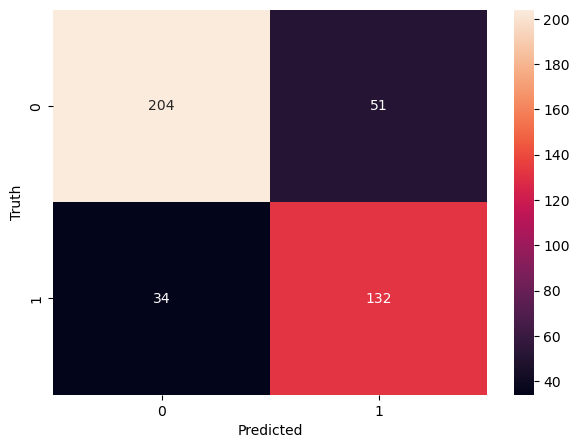

In [25]:
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Classification Report**

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       255
           1       0.72      0.80      0.76       166

    accuracy                           0.80       421
   macro avg       0.79      0.80      0.79       421
weighted avg       0.80      0.80      0.80       421



**Use 3 as K value without applying PCA**

In [27]:
classifier = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [28]:
classifier.score(X_test,y_test)

0.8052256532066508

**Confusion Matrix**

In [29]:
y_pred = classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[209,  46],
       [ 36, 130]])

Text(58.222222222222214, 0.5, 'Truth')

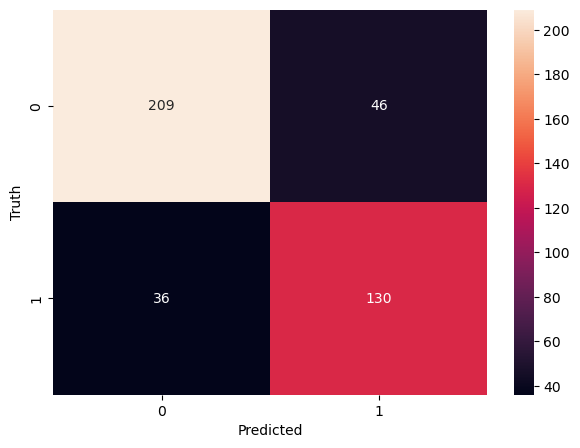

In [30]:
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Classification Report**

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       255
           1       0.74      0.78      0.76       166

    accuracy                           0.81       421
   macro avg       0.80      0.80      0.80       421
weighted avg       0.81      0.81      0.81       421



**Use 5 as K value after applying PCA**

In [32]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train_pca,y_train)

KNeighborsClassifier()

In [33]:
classifier.score(X_test_pca,y_test)

0.9144893111638955

**Confusion Matrix**

In [34]:
y_pred = classifier.predict(X_test_pca)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[239,  16],
       [ 20, 146]])

Text(58.222222222222214, 0.5, 'Truth')

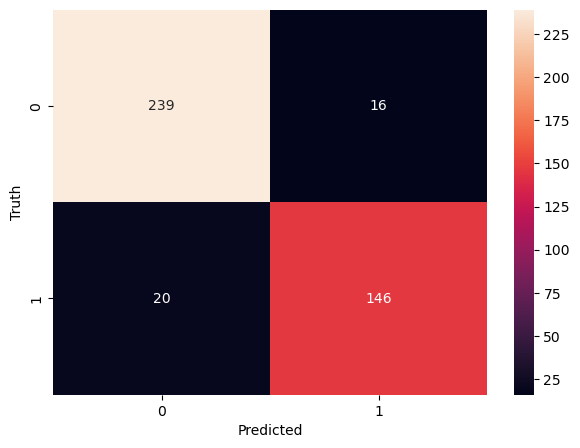

In [35]:
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Classification Report**

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       255
           1       0.90      0.88      0.89       166

    accuracy                           0.91       421
   macro avg       0.91      0.91      0.91       421
weighted avg       0.91      0.91      0.91       421



**Use 11 as K value after applying PCA**

In [37]:
classifier = KNeighborsClassifier(n_neighbors=11, metric='minkowski', p=2)
classifier.fit(X_train_pca,y_train)

KNeighborsClassifier(n_neighbors=11)

In [38]:
classifier.score(X_test_pca,y_test)

0.9121140142517815

**Confusion Matrix**

In [39]:
y_pred = classifier.predict(X_test_pca)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[241,  14],
       [ 23, 143]])

Text(58.222222222222214, 0.5, 'Truth')

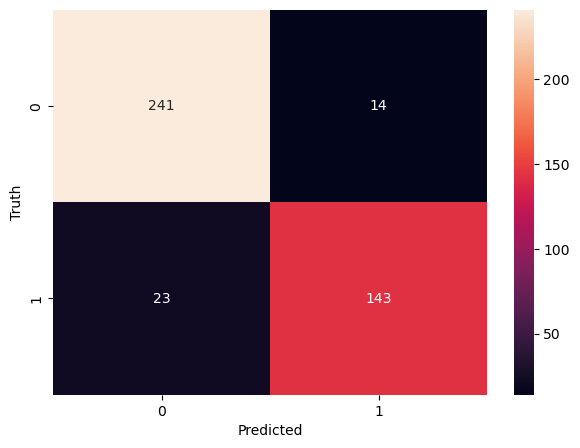

In [40]:
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Classification Report**

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       255
           1       0.91      0.86      0.89       166

    accuracy                           0.91       421
   macro avg       0.91      0.90      0.91       421
weighted avg       0.91      0.91      0.91       421



**Use 3 as K value after applying PCA**

In [42]:
classifier = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)
classifier.fit(X_train_pca,y_train)

KNeighborsClassifier(n_neighbors=3)

In [43]:
classifier.score(X_test_pca,y_test)

0.9097387173396675

**Confusion Matrix**

In [44]:
y_pred = classifier.predict(X_test_pca)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[239,  16],
       [ 22, 144]])

Text(58.222222222222214, 0.5, 'Truth')

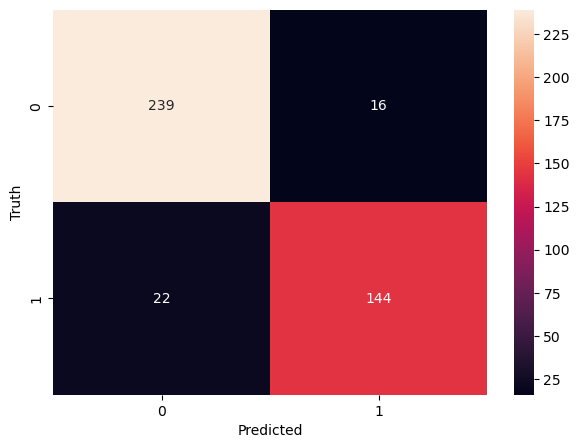

In [45]:
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Classification Report**

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       255
           1       0.90      0.87      0.88       166

    accuracy                           0.91       421
   macro avg       0.91      0.90      0.90       421
weighted avg       0.91      0.91      0.91       421



# Decision Trees

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
spam_email_tree = DecisionTreeClassifier(random_state=0,criterion='gini')
spam_email_tree

DecisionTreeClassifier(random_state=0)

**Using data without perform PCA**

In [49]:
spam_email_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

# Checking accuracy of testing dataset

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
predTree = spam_email_tree.predict(X_test)

In [52]:
print (predTree [0:5])
print (y_test [0:5])

[1 0 0 1 0]
3681    0
2230    0
2533    0
195     1
2913    0
Name: spam, non-spam classes, dtype: int64


In [53]:
spam_email_tree.score(X_test,y_test)

0.9121140142517815

# Checking accuracy of training dataset

In [54]:
predictions_train = spam_email_tree.predict(X_train)
accuracy_score(y_train,predictions_train)

0.9992082343626286

# Visualizing our final decision tree

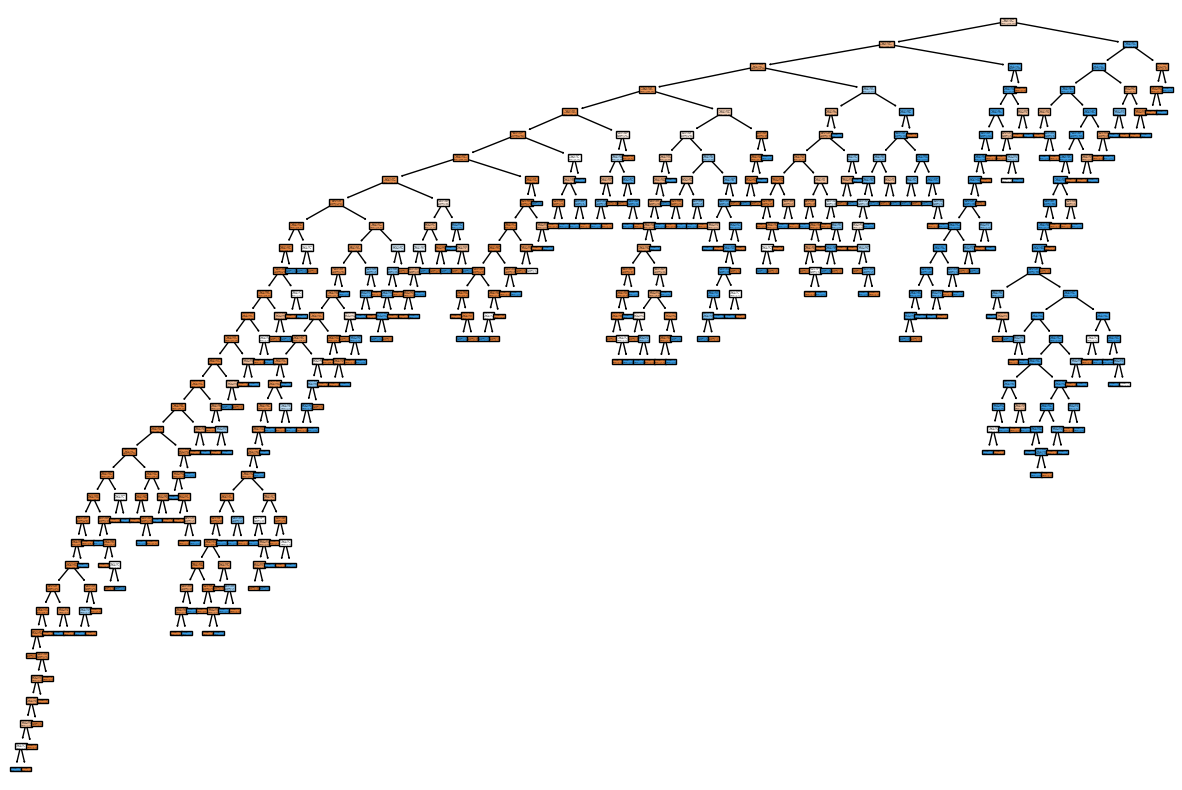

In [55]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(spam_email_tree,filled=True)
plt.show()

# Evaluating our test dataset

**Confusion Matrix**

In [56]:
conf_matrix = confusion_matrix(y_test, predTree)
conf_matrix

array([[234,  21],
       [ 16, 150]])

Text(58.222222222222214, 0.5, 'Truth')

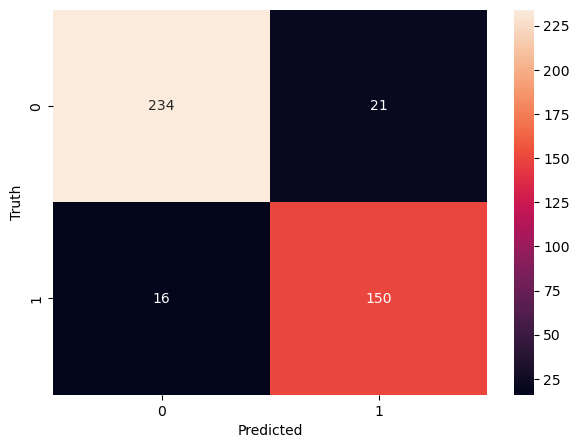

In [57]:
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Classification Report**

In [58]:
print(classification_report(y_test, predTree))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       255
           1       0.88      0.90      0.89       166

    accuracy                           0.91       421
   macro avg       0.91      0.91      0.91       421
weighted avg       0.91      0.91      0.91       421



**Using data after perform PCA**

In [59]:
spam_email_tree.fit(X_train_pca,y_train)

DecisionTreeClassifier(random_state=0)

# Checking accuracy of testing dataset

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
predTree = spam_email_tree.predict(X_test_pca)

In [62]:
print (predTree [0:5])
print (y_test [0:5])

[1 0 0 1 0]
3681    0
2230    0
2533    0
195     1
2913    0
Name: spam, non-spam classes, dtype: int64


In [63]:
spam_email_tree.score(X_test_pca,y_test)

0.8764845605700713

# Checking accuracy of training dataset

In [64]:
predictions_train = spam_email_tree.predict(X_train_pca)
accuracy_score(y_train,predictions_train)

0.9992082343626286

# Visualizing our final decision tree

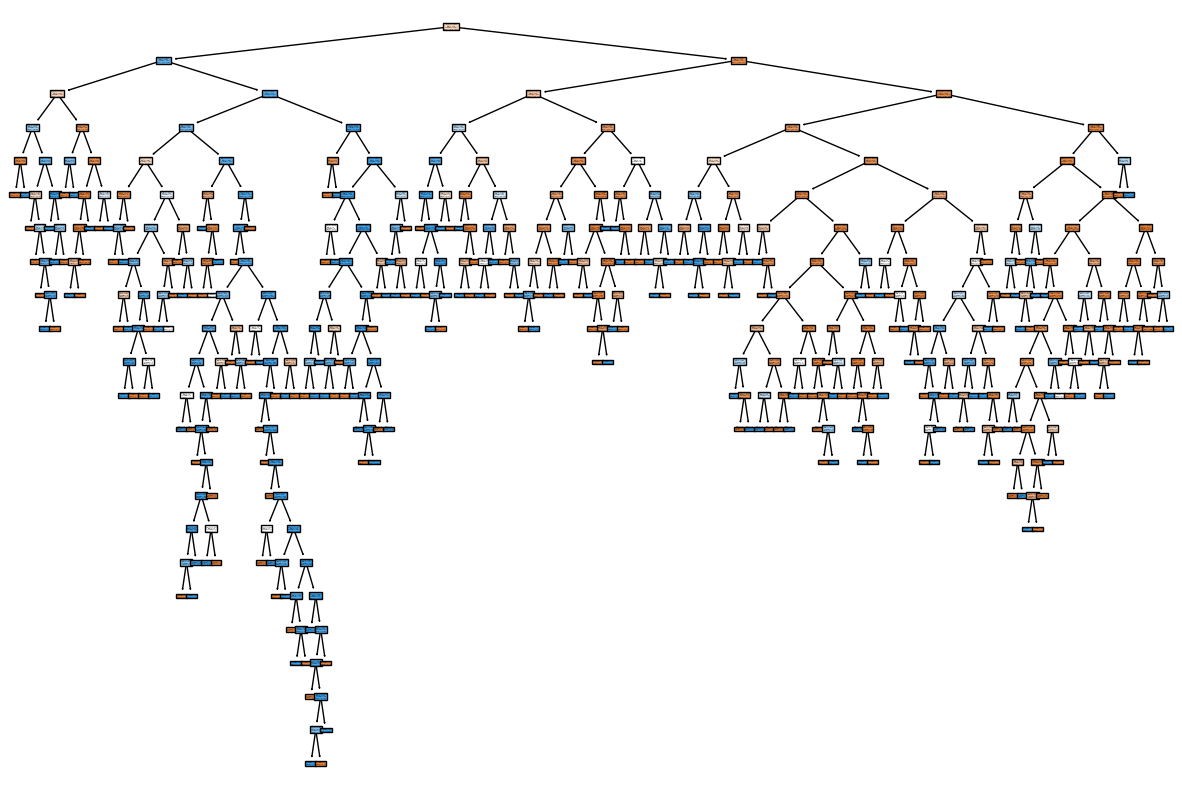

In [65]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(spam_email_tree,filled=True)
plt.show()

# Evaluating our test dataset

**Confusion Matrix**

In [66]:
conf_matrix = confusion_matrix(y_test, predTree)
conf_matrix

array([[229,  26],
       [ 26, 140]])

Text(58.222222222222214, 0.5, 'Truth')

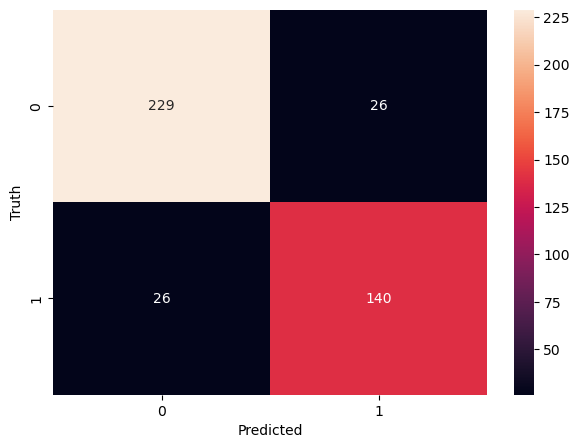

In [67]:
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Classification Report**

In [68]:
print(classification_report(y_test, predTree))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       255
           1       0.84      0.84      0.84       166

    accuracy                           0.88       421
   macro avg       0.87      0.87      0.87       421
weighted avg       0.88      0.88      0.88       421

